In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 1.11.0


In [2]:
def get_data():
    return pd.read_csv("./ipca.csv", header=None, delimiter=";")

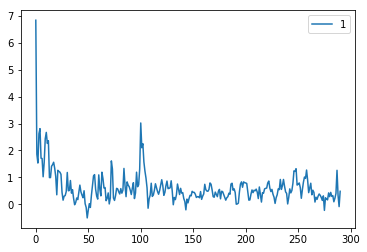

In [3]:
data = get_data()
data.plot()

In [4]:
df = pd.DataFrame()
df['t-1'] = data[1].shift(1)
df['t'] = data[1]
df['t+1'] = df['t'].shift(-1)
df.dropna(inplace=True)
df.head()

,t-1,t,t+1
1,6.84,1.86,1.53
2,1.86,1.53,2.62
3,1.53,2.62,2.81
4,2.62,2.81,1.71
5,2.81,1.71,1.70


In [5]:
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)
X, y = scaled_data[:, :1], scaled_data[:, -1]
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=1)

In [6]:
# build model

model = keras.Sequential()
model.add(Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(1, activation='sigmoid'))

# optimizer = tf.train.RMSPropOptimizer(0.001)
# optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optimizer = keras.optimizers.Adagrad(lr=0.05, epsilon=None, decay=0.0)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0)

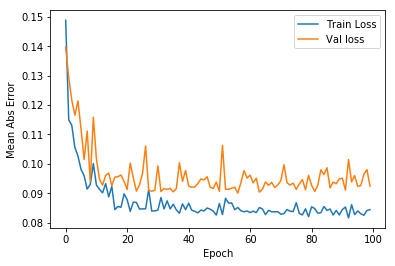

In [8]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Val loss')
plt.legend()
# plt.ylim([0, 5])
plt.show()

In [9]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:.2f}".format(mae))

Testing set Mean Abs Error: 0.08


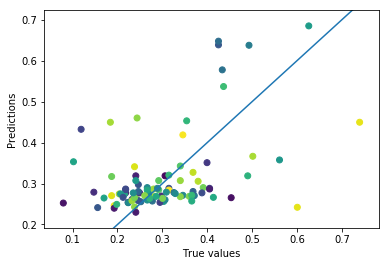

In [10]:
test_predictions = model.predict(test_data).flatten()

# predictions = scaler.inverse_transform(test_predictions.reshape(2,-1))

plt.scatter(test_labels, test_predictions, c=np.random.rand(len(test_predictions)))
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('normal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

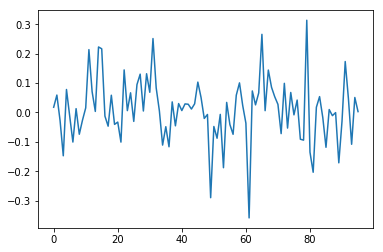

In [11]:
error = test_predictions - test_labels
plt.plot(error)
plt.show()